In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
housing_prices_df_raw = pd.read_csv('../src/data/train.csv')
test_housing_prices_df_raw = pd.read_csv('../src/data/test.csv')

In [3]:
train_hdf = housing_prices_df_raw.copy()
test_hdf = test_housing_prices_df_raw.copy()
hdf = pd.concat([train_hdf, test_hdf], axis = 0, sort = False)

# Feature Selection/Data Wragling

In [4]:
# Feature list
geo_feat = ['LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LandSlope', 
            'LotConfig']
location_feat = ['MSZoning', 'Street', 'Alley', 'Neighborhood', 'Condition1',
                'Condition2']
house_feat = set(['MSSubClass', 'BldgType', 'HouseStyle',                                   #Types

              'OverallQual', 'OverallCond',                                             #Quality(general)

              'RoofStyle', 'RoofMatl',                                                  #Roof 

              'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',     #Material and cond

              'MasVnrType', 'MasVnrArea',                                               #Mansonry

              'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtQual',     #Basement variables
              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFinType2', 'BsmtFullBath',
              'BsmtHalfBath',

              'Heating', 'HeatingQC', 'CentralAir',                                      #Heating/AC
               
              'Electrical', 'Utilities',                                                 #Energy
               
              '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',                       #Some house measures
               
               'FullBath', 'HalfBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd',
               'Fireplaces',
               
               'KitchenQual', 'FireplaceQu',
               
               'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',  #Garage variables
               'GarageQual', 'GarageCond', 
               
               'Functional',
               'PavedDrive',
               'WoodDeckSF',
              
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',               #Porch

               'PoolArea', 'PoolQC',                                                     #Pool

               'Fence', 
              
               'MiscFeature', 'MiscVal'])

time_feat = ['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd']             
sale_feat = ['SaleType', 'SaleCondition']

# feat = set(geo_feat + location_feat + house_feat + time_feat + sale_feat)

In [5]:
#LotShape?, BsmtExposure?
ord_feat  = set(['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtCond',
             'BsmtFullBath','BsmtHalfBath', 
             
             'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', #Is it?
#              'Bedroom', 'Kitchen', #Not in dataframe??
    
             'KitchenQual', 'FireplaceQu', 'GarageCars', 'GarageQual', 'GarageCond',
             'Functional', 'PoolQC', 'BsmtQual'
             ])


cat_feat  = set(['LotShape', 'LandContour', 'LotConfig', 'MSZoning', 'Street', 
             'Alley', 'Neighborhood', 'Condition1', 'Condition2', 'MSSubClass', 
             'BldgType', 'HouseStyle', 'LandSlope', 'Exterior1st', 'Exterior2nd',
             'Foundation', 'MasVnrType', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',
             'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Utilities',
             'GarageType', 'GarageFinish', 'PavedDrive', 'Fence','MiscFeature',
             'SaleType', 'SaleCondition', 'RoofStyle', 'RoofMatl'
            ])


cont_feat = set(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
             'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
             'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
             'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
             
             'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd' #?
            ])


## Finding NA's

In [6]:
hdf.loc[:,hdf.isnull().sum() > 0]
hdf.isnull().sum()[hdf.isnull().sum() > 0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [7]:
# In percentage
print(hdf.shape)
round(100*hdf.isnull().sum()[hdf.isnull().sum() > 0]/len(hdf), 2)

(2919, 81)


MSZoning         0.14
LotFrontage     16.65
Alley           93.22
Utilities        0.07
Exterior1st      0.03
Exterior2nd      0.03
MasVnrType       0.82
MasVnrArea       0.79
BsmtQual         2.77
BsmtCond         2.81
BsmtExposure     2.81
BsmtFinType1     2.71
BsmtFinSF1       0.03
BsmtFinType2     2.74
BsmtFinSF2       0.03
BsmtUnfSF        0.03
TotalBsmtSF      0.03
Electrical       0.03
BsmtFullBath     0.07
BsmtHalfBath     0.07
KitchenQual      0.03
Functional       0.07
FireplaceQu     48.65
GarageType       5.38
GarageYrBlt      5.45
GarageFinish     5.45
GarageCars       0.03
GarageArea       0.03
GarageQual       5.45
GarageCond       5.45
PoolQC          99.66
Fence           80.44
MiscFeature     96.40
SaleType         0.03
SalePrice       49.98
dtype: float64

In [8]:
hdf.loc[hdf['Fence'].isnull(),'Fence'] = 'NoFen'
# hdf.loc[hdf['PoolQC'].isnull(), 'PoolQC'] = 'NoPool'
hdf.loc[hdf['FireplaceQu'].isnull(), 'FireplaceQu'] = 'NoFir'
hdf.loc[hdf['Alley'].isnull(), 'Alley'] = 'NoAcc'

In [9]:
from scipy import stats
for gar in ['GarageFinish', 'GarageQual', 'GarageCond', 'GarageType']:
    hdf.loc[hdf[gar].isnull(), gar] = 'NoGar'

# There should be a better way to do this
hdf.loc[hdf['GarageYrBlt'].isnull(), 'GarageYrBlt'] = round(np.mean(hdf['GarageYrBlt']))


for bsmt in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    hdf.loc[hdf[bsmt].isnull(), bsmt] = 'NoBsmt'



In [10]:
for col in set(hdf.columns) - {'SalePrice'}:
    if hdf[col].dtype == 'object':
        hdf[col] = hdf[col].fillna(stats.mode(hdf[col]).mode[0])
    else:
        hdf[col] = hdf[col].fillna(np.median(hdf.loc[~hdf[col].isnull(), col]))

In [11]:
round(100*hdf.isnull().sum()[hdf.isnull().sum() > 0]/len(hdf), 2)

SalePrice    49.98
dtype: float64

In [12]:
hdf['remodeled'] = pd.Series(['Yes' if a > 0 else 'No' for a in (hdf['YearRemodAdd'] - hdf['YearBuilt'])])

In [13]:
hdf['TotalPorchAreasSF'] = hdf['OpenPorchSF'] + hdf['EnclosedPorch'] + hdf['3SsnPorch'] + hdf['ScreenPorch'] + \
                              hdf['WoodDeckSF']

In [14]:
hdf ['TotalBath'] = hdf['FullBath'] + hdf['BsmtFullBath'] + .5*(hdf['HalfBath'] + hdf['BsmtHalfBath'])

In [15]:
hdf.drop(columns = ['Utilities', 'Street', 'PoolQC'], inplace = True)
hdf.drop(columns = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], inplace = True) #there is totalbsmt
hdf.drop(columns = ['FullBath', 'BsmtFullBath', 'HalfBath','BsmtHalfBath'], inplace = True)
hdf.drop(columns = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF'], inplace = True)
hdf.drop(columns = 'MiscFeature', inplace = True) # drop feature (since price of feature is in miscval)
hdf.drop(columns = 'LotFrontage', inplace = True)

In [16]:
cat_feat = cat_feat - set(['MiscFeature', 'Utilities', 'Street'])
house_feat = house_feat - set(['MiscFeature', 'Utilities', 'Street', 'PoolQC'])

ord_feat = ord_feat - set(['FullBath', 'PoolQC', 'HalfBath', 'BsmtHalfBath', 'BsmtFullBath', 'PoolQC'])

# Removing some outliers

In [17]:
# Dummify and Transforming prine to log price
X = pd.get_dummies(hdf, columns = list(cat_feat)+list(ord_feat), drop_first=True)

X_train = X.loc[~X['SalePrice'].isnull(), :]
# #Removing Outliers


X_train = X_train.loc[X_train['GrLivArea'] < 4000,:]
X_train = X_train.loc[X_train['LotArea'] < 100000,:]


y_train = np.log1p(X_train.loc[~X_train['SalePrice'].isnull(), 'SalePrice'])



X_train.drop(columns = ['Id', 'SalePrice'], inplace = True)


X_test = X.loc[X['SalePrice'].isnull(), :]

X_test.drop(columns = ['Id', 'SalePrice'], inplace = True)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
# X_train.plot(kind = 'scatter', x = 'GrLivArea', y = 'SalePrice')

# X_train.plot(kind = 'scatter', x = 'GrLivArea', y = 'SalePrice')

The plot justifies the removal of hourses with 'GrLivArea' > 4000 (high leverage).

In [19]:
# hdf.plot(kind = 'scatter', x = 'LotArea', y = 'SalePrice')


The plot justifies the removal of hourses with 'LotArea' > 100000 (high leverage).

In [20]:
# hdf.plot(kind = 'scatter', x = 'LotFrontage', y = 'SalePrice')
# X_train = X_train.loc[X_train['LotFrontage'] < 250, ]


#### Remove LotFrontage before removing it

# Initialize

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import VarianceThreshold

from scipy import stats

In [22]:
# Normalization of the columns


# for col in X.columns[1:]:
#     X[col] = (X[col] - np.mean(X[col]))/np.std(X[col], ddof=1)

### We fit a simple linear model for 'GrLivArea' with Sale price in log

(array([ 96., 539., 445., 210.,  94.,  36.,  20.,   6.,   3.,   3.]),
 array([ 12839.36037632,  34547.92619985,  56256.49202338,  77965.0578469 ,
         99673.62367043, 121382.18949396, 143090.75531749, 164799.32114101,
        186507.88696454, 208216.45278807, 229925.01861159]),
 <a list of 10 Patch objects>)

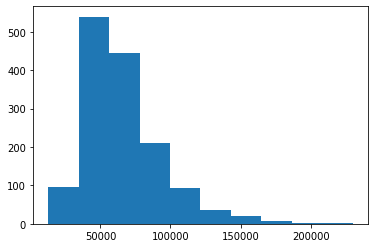

In [23]:
plt.hist(np.exp(y_train-1))

(array([  5.,  10.,  34., 141., 401., 423., 259., 128.,  42.,   9.]),
 array([10.46027076, 10.74879454, 11.03731831, 11.32584209, 11.61436587,
        11.90288964, 12.19141342, 12.4799372 , 12.76846098, 13.05698475,
        13.34550853]),
 <a list of 10 Patch objects>)

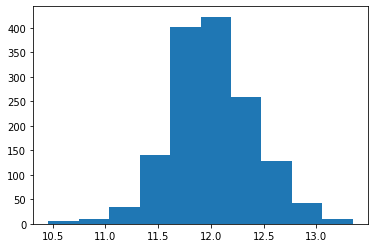

In [24]:
plt.hist(y_train)

In [25]:
slm_LivArea_log = LinearRegression()
slm_LivArea_log.fit(X_train[['GrLivArea']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

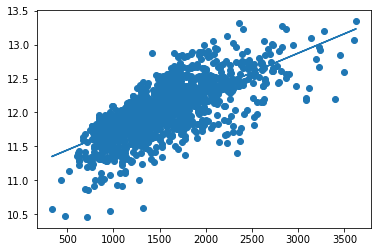

In [26]:
plt.scatter(X_train[['GrLivArea']], y_train)
plt.plot(X_train[['GrLivArea']], slm_LivArea_log.predict(X_train[['GrLivArea']]))

# Feature generation

In [ ]:
# hdf['SalePrice'] = np.log1p(hdf['SalePrice'])

In [ ]:
# hdf['YearRemodDif'] = - hdf['YearBuilt'] + hdf['YearRemodAdd']

# Drop columns with low variance

In [ ]:
vr = []
for col in X.columns:
    vr.append((np.var(X[col]), col))

In [ ]:
X_LV = X.copy()
X_LV = X_LV.drop(columns = list(map(lambda x: x[1], filter(lambda x: x[0] > .8*(1-.8), vr))))

In [ ]:
# Normalization
for col in X_LV.columns:
    X_LV[col] = (X_LV[col] - np.mean(X_LV[col]))/np.std(X_LV[col], ddof=1)

# Lasso feature selection

In [ ]:
from sklearn.linear_model import Lasso
import seaborn as sns

In [ ]:
lasso_lm = Lasso(max_iter=1e7, warm_start=True)

In [ ]:
## Try this as well. takes a long time!
lasso_coefs = []
alphas      = np.logspace(-6, 1, 1000)

In [ ]:
lasso_coefs = []
alphas      = np.logspace(-2, 0.5, 2)

In [ ]:
for alpha in alphas:
    lasso_lm.set_params(alpha = alpha).fit(X, y)
    lasso_coefs.append(lasso_lm.coef_)

In [ ]:
df_coef = pd.DataFrame(lasso_coefs, index=alphas, columns = X.columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title, legend = False)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

In [ ]:
df_coef.iloc[:, np.random.choice(range(df_coef.shape[1]), size = 5, replace = False)].plot(logx=True, title=title)

In [ ]:
coef_orders = []
for row in df_coef.index:
    coef_orders.extend([list(df_coef.loc[:,df_coef.loc[row, :] > 0.001].columns)])

In [ ]:
last = []
s = 0
for i in sorted(np.unique(coef_orders), key = len):
    print (set(i) - set(last))
    s += len(set(i) - set(last))
    last = i
    
print (s)

In [ ]:
sns.pairplot(hdf[['YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']])

In [ ]:
corr = hdf.corr()

f, ax = plt.subplots(figsize = (11,9))
sns.heatmap(corr)

In [ ]:
hdf.plot(kind = 'scatter', x = 'YearRemodAdd', y =  'SalePrice')

In [ ]:
hdf.plot(kind = 'scatter', x = 'YearBuilt', y =  'SalePrice')

# Grid search CV in lasso regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
lasso_gs = Lasso(max_iter = 1e7, warm_start = True)

In [ ]:
grid_params = [{'alpha': np.logspace(-6, -2, 10)}]

In [ ]:
lasso_param_search = GridSearchCV(estimator = lasso_gs, 
                                  param_grid = grid_params, cv=10, 
                                  return_train_score=True,
                                  scoring='r2', verbose=2)

In [ ]:
lasso_param_search.fit(X_train, y_train)

In [ ]:
mean_test_score = lasso_param_search.cv_results_['mean_test_score']
std_test_score = lasso_param_search.cv_results_['std_test_score']
mean_train_score = lasso_param_search.cv_results_['mean_train_score']
std_train_score = lasso_param_search.cv_results_['std_train_score']

params = list(map(lambda s: s['alpha'], lasso_param_search.cv_results_['params']))

In [ ]:
lasso_vis_df = pd.DataFrame({'param': params, 'mean_test_score': mean_test_score,
                             'std_test_score': std_test_score, 
                             'mean_train_score':mean_train_score,
                             'std_train_score': std_train_score})

In [ ]:
lasso_vis_df.plot(x = 'param', y = ['mean_train_score', 'mean_test_score'])

In [ ]:
lasso_gs2 = Lasso(max_iter = 1e7, warm_start = True)

In [ ]:
grid_params2 = [{'alpha': np.linspace(0.002, 0.004, 10000)}]

In [ ]:
lasso_param_search2 = GridSearchCV(estimator = lasso_gs2, 
                                  param_grid = grid_params2, cv=10, 
                                  return_train_score=True,
                                  scoring='r2', verbose=2)

In [ ]:
lasso_param_search2.fit(X_train, y_train)

In [ ]:
mean_test_score = lasso_param_search2.cv_results_['mean_test_score']
std_test_score = lasso_param_search2.cv_results_['std_test_score']
mean_train_score = lasso_param_search2.cv_results_['mean_train_score']
std_train_score = lasso_param_search2.cv_results_['std_train_score']

params = list(map(lambda s: s['alpha'], lasso_param_search2.cv_results_['params']))

In [ ]:
lasso_vis_df = pd.DataFrame({'param': params, 'mean_test_score': mean_test_score,
                             'std_test_score': std_test_score, 
                             'mean_train_score':mean_train_score,
                             'std_train_score': std_train_score})

In [ ]:
lasso_vis_df.plot(x = 'param', y = ['mean_train_score', 'mean_test_score'])

In [ ]:
best_alpha = lasso_param_search2.best_estimator_.get_params()['alpha']

In [ ]:
lasso_param_search2.score(X_test, y_test)

# Training on te full dataset

In [ ]:
train_all_best = Lasso()

In [ ]:
train_all_best.set_params(alpha = best_alpha, max_iter = 1e7, warm_start = True)

In [ ]:
train_all_best.fit(X, y)

In [ ]:
train_all_best.score(X, y)

# Fitting the model to the test set

In [ ]:
test_house_pricing_raw = pd.read_csv('../src/data/test.csv')
test_hdf = test_house_pricing_raw.copy()

In [ ]:
set(test_house_pricing_raw.columns)  - set(housing_prices_df_raw.columns)

### Cleaning the test set

In [ ]:
test_hdf.loc[test_hdf['Fence'].isnull(),'Fence'] = 'NoFen'
# test_hdf.loc[test_hdf['PoolQC'].isnull(), 'PoolQC'] = 'NoPool'
test_hdf.loc[test_hdf['FireplaceQu'].isnull(), 'FireplaceQu'] = 'NoFir'
test_hdf.loc[test_hdf['Alley'].isnull(), 'Alley'] = 'NoAcc'

for gar in ['GarageFinish', 'GarageQual', 'GarageCond', 'GarageType']:
    test_hdf.loc[test_hdf[gar].isnull(), gar] = 'NoGar'

# There should be a better way to do this
test_hdf.loc[test_hdf['GarageYrBlt'].isnull(), 'GarageYrBlt'] = round(np.mode(test_hdf['GarageYrBlt']))


for bsmt in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    test_hdf.loc[test_hdf[bsmt].isnull(), bsmt] = 'NoBsmt'

test_hdf = test_hdf.drop(columns = 'MiscFeature') # drop feature (since price of feature is in miscval)

test_hdf = test_hdf.drop(columns = 'LotFrontage')
test_hdf = test_hdf.drop(labels = test_hdf.loc[test_hdf['MasVnrType'].isnull(),:].index)
test_hdf = test_hdf.drop(labels = test_hdf.loc[test_hdf['Electrical'].isnull(),:].index)

In [ ]:
test_hdf.isnull().sum()[test_hdf.isnull().sum() > 0]

In [ ]:
test_hdf = pd.get_dummies(test_hdf, columns = cat_feat+ord_feat, drop_first=True)

In [ ]:
lasso_param_search2

In [ ]:
lasso_param_search2.predict(test_hdf.loc[:, test_hdf.columns != 'Id'])

In [ ]:
submission = pd.DataFrame({'Id': test_hdf['Id'], 'SalePrice': np.expm1(
    lasso_param_search2.predict(test_hdf.loc[:, test_hdf.columns != 'Id']))})

